In [1]:
%load_ext autoreload
%autoreload 2

# todo
# - absorb latent code to ml4a.utils.latents

from ml4a import image
from ml4a.models import stylegan2

In [2]:
stylegan2.get_pretrained_models()

dict_keys(['ffhq', 'landscapes', 'wikiarts'])

In [3]:
network_pkl = stylegan2.get_pretrained_model('wikiarts')
stylegan2.load_model(network_pkl, randomize_noise=False)

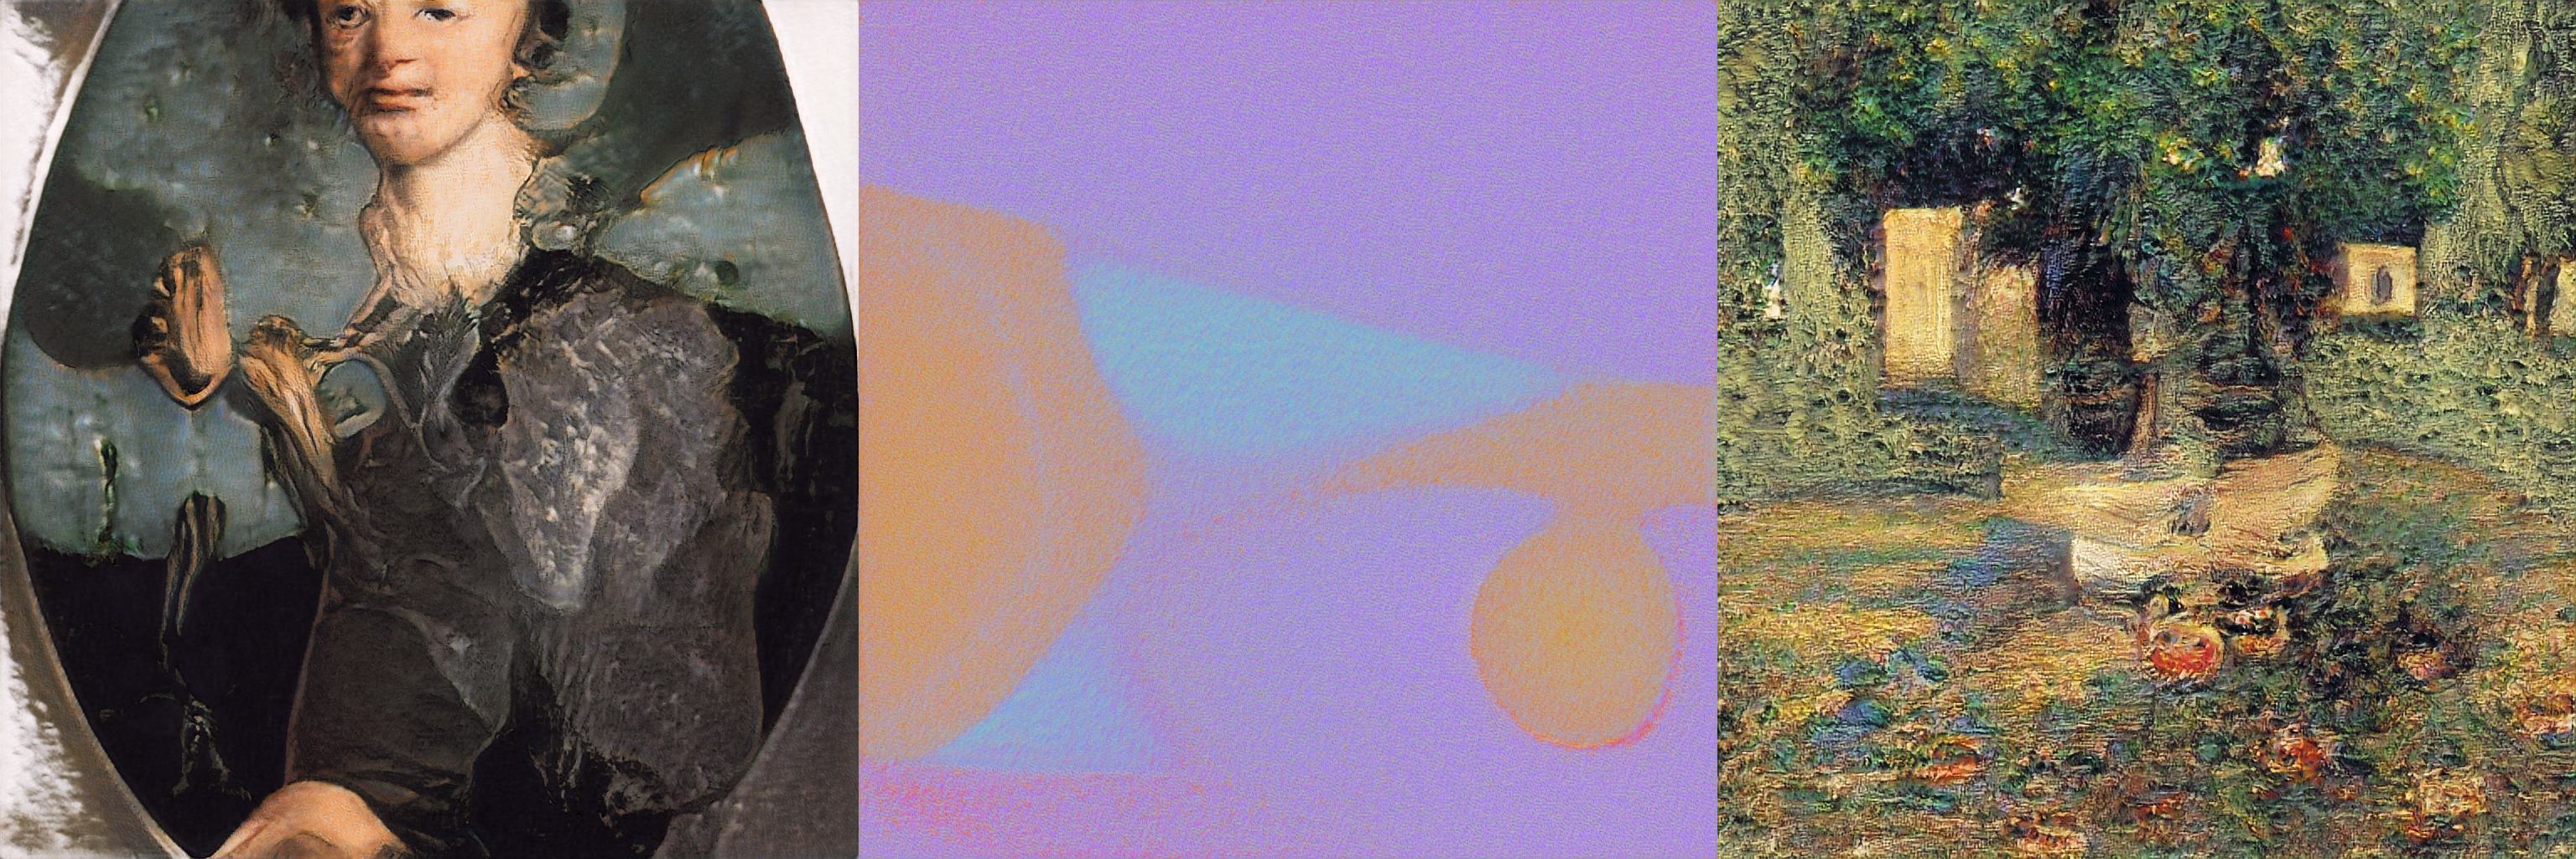

In [4]:
label = None #[1, 0, 0, 0, 0, 0]
samples, _ = stylegan2.random_sample(3, label, truncation=1.0)
image.display(samples)

In [6]:
stylegan2.generate_interpolation_video('face_interpolation.mp4', labels=None, truncation=1, duration_sec=5.0)

t:   0%|          | 0/150 [00:00<?, ?it/s, now=None]

Moviepy - Building video face_interpolation.mp4.
Moviepy - Writing video face_interpolation.mp4



Moviepy - Done !
Moviepy - video ready face_interpolation.mp4


# saving favorites

In [ ]:
def bookmark(latents, new_faves):
    for f in new_faves:
        faves.append(latents[f])

def show_faves(faves, truncation=0.5):
    latents = np.array(faves)
    labels = np.zeros([latents.shape[0]] + Gs.input_shapes[1][1:])
    n = len(faves)
    nr, nc = math.ceil(n / 6), 6
    for r in range(nr):
        images = Gs.run(latents[6*r:min(n, 6*(r+1))], None, truncation_psi=truncation, randomize_noise=False, output_transform=fmt)
        img1 = np.concatenate([img for img in images], axis=1)
        plt.figure(figsize=(24,4))
        plt.imshow(img1)